# ***Histograms as functions of $\alpha_0,\alpha_1,\beta_2$***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def plot_garch_separate(alpha0, alpha1, beta1, seed=False, summary=False,df=4):
    if seed:
        np.random.seed(42)

    #Gaussian innovations
    model_gaussian = [np.random.normal(0, 1)]
    volatilities_gaussian = [abs(np.random.normal(0, 1))]

    #t-distributed innovations
    model_t = [scipy.stats.t.rvs(df=df,loc=0,scale=np.sqrt((df-2)/2))]
    volatilities_t = [abs(np.random.standard_t(df=df))]

    for i in range(1, 30000):
        #Gaussian
        vol_gaussian = np.sqrt(alpha0 + alpha1 * (model_gaussian[i-1]**2) + beta1 * (volatilities_gaussian[i-1]**2))
        volatilities_gaussian.append(vol_gaussian)
        z_gaussian = np.random.normal(0, 1)
        model_gaussian.append(vol_gaussian * z_gaussian)

        #t-distributed
        vol_t = np.sqrt(alpha0 + alpha1 * (model_t[i-1]**2) + beta1 * (volatilities_t[i-1]**2))
        volatilities_t.append(vol_t)
        z_t = scipy.stats.t.rvs(df=df, loc=0, scale=np.sqrt((df-2)/df))
        model_t.append(vol_t * z_t)

    #kurtosis
    kurtosis_gaussian = scipy.stats.kurtosis(model_gaussian, fisher=False)
    kurtosis_t = scipy.stats.kurtosis(model_t, fisher=False)


    x_gaussian = np.linspace(np.min(model_gaussian), np.max(model_gaussian), 300)
    plt.figure(figsize=(10*0.75, 6*0.75))
    plt.hist(model_gaussian, density=True, bins=100, color='lightsteelblue', alpha=0.7, edgecolor="gray", label="Gaussian Marginal")
    plt.plot(x_gaussian, scipy.stats.norm.pdf(x_gaussian, np.mean(model_gaussian), np.std(model_gaussian)), label="Gaussian Fit", color='navy')
    plt.title(r"Marginal Distribution of $X_t$ with Gaussian Innovations", fontsize=16)
    plt.xlabel(r"$X_t$")
    plt.ylabel("Density")
    plt.legend(loc="upper right")
    plt.text(
        0.02, 0.98,
        fr"Parameters: $\alpha_0={alpha0}$, $\alpha_1={alpha1}$, $\beta_1={beta1}$"
        + f"\nKurtosis: {kurtosis_gaussian:.2f}",
        transform=plt.gca().transAxes,
        verticalalignment='top',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5),
    )
    plt.tight_layout()
    plt.show()

    #plot t
    x_t = np.linspace(np.min(model_t), np.max(model_t), 300)
    plt.figure(figsize=(10*0.75, 6*0.75))
    plt.hist(model_t, density=True, bins=100, color='peachpuff', alpha=0.7, edgecolor="gray", label=fr"$t$-Distributed Marginal (df={df})")
    plt.plot(x_t, scipy.stats.t.pdf(x_t, df=df, loc=np.mean(model_t),scale=np.std(model_t)), label=fr"Scaled $t$-Fit (df={df})", color='darkorange')
    plt.title(r"Marginal Distribution of $X_t$ with $t$-Distributed Innovations", fontsize=16)
    plt.xlabel(r"$X_t$")
    plt.ylabel("Density")
    plt.legend(loc="upper right")
    plt.text(
        0.02, 0.98,
        fr"Parameters: $\alpha_0={alpha0}$, $\alpha_1={alpha1}$, $\beta_1={beta1}$"
        + f"\nKurtosis: {kurtosis_t:.2f}",
        transform=plt.gca().transAxes,
        verticalalignment='top',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5),
    )
    plt.tight_layout()
    plt.show()

    if summary:
        print("Summary for Gaussian Innovations:")
        print("Observed Variance of X_t:", round(np.var(model_gaussian), 3))
        print("Theoretical Variance of X_t:", round(alpha0 / (1 - (alpha1 + beta1)), 3))
        print("\nSummary for t-Distributed Innovations:")
        print("Observed Variance of X_t:", round(np.var(model_t), 3))
        print("Theoretical Variance of X_t (approximated):", round(alpha0 / (1 - (alpha1 + beta1)), 3))


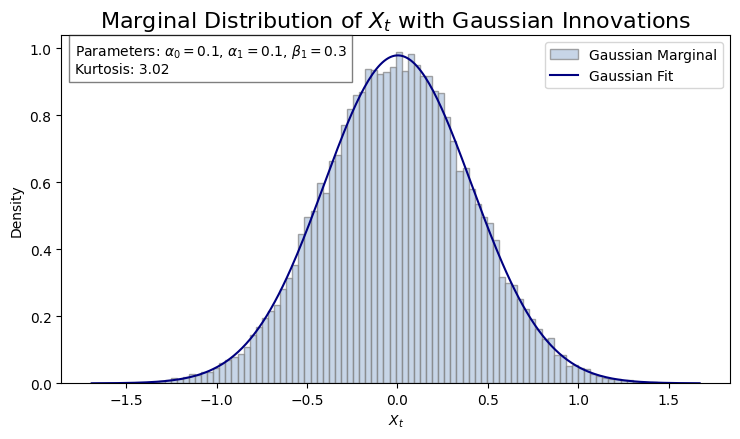

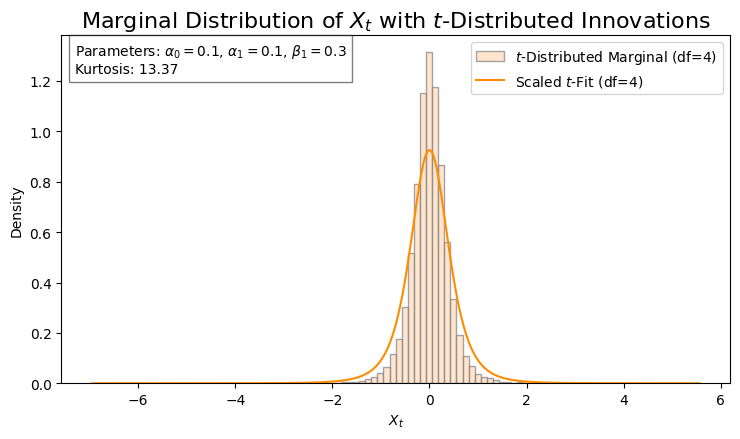

Summary for Gaussian Innovations:
Observed Variance of X_t: 0.166
Theoretical Variance of X_t: 0.167

Summary for t-Distributed Innovations:
Observed Variance of X_t: 0.164
Theoretical Variance of X_t (approximated): 0.167


In [2]:
plot_garch_separate(alpha0=0.1, alpha1=0.1, beta1=0.3, seed=True,summary=True,df=4)

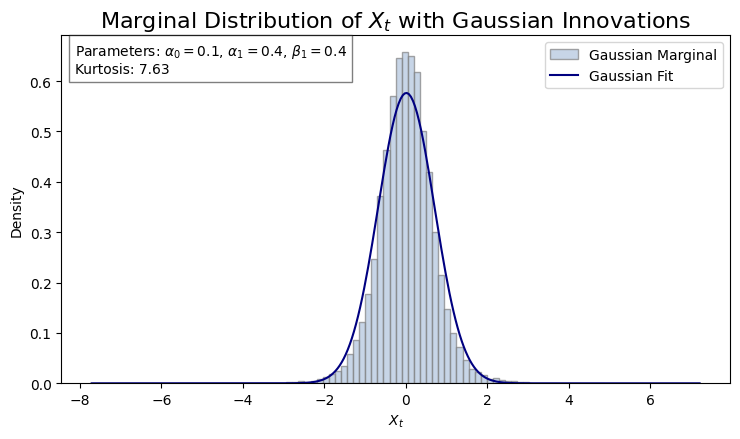

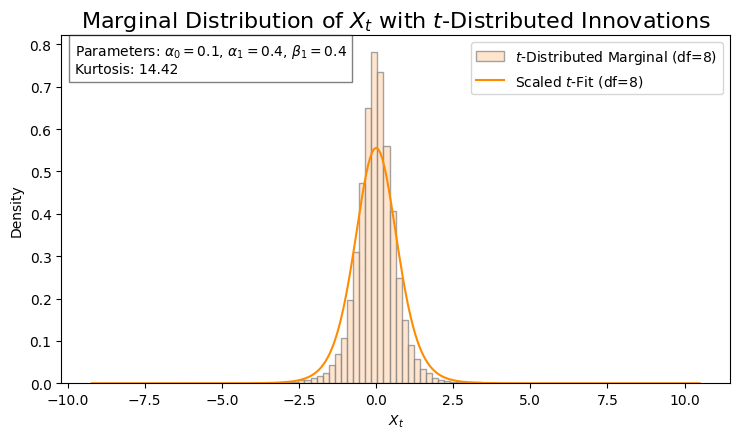

Summary for Gaussian Innovations:
Observed Variance of X_t: 0.479
Theoretical Variance of X_t: 0.5

Summary for t-Distributed Innovations:
Observed Variance of X_t: 0.484
Theoretical Variance of X_t (approximated): 0.5


In [3]:
plot_garch_separate(0.1,0.4,0.4,seed=True,summary=True,df=8)

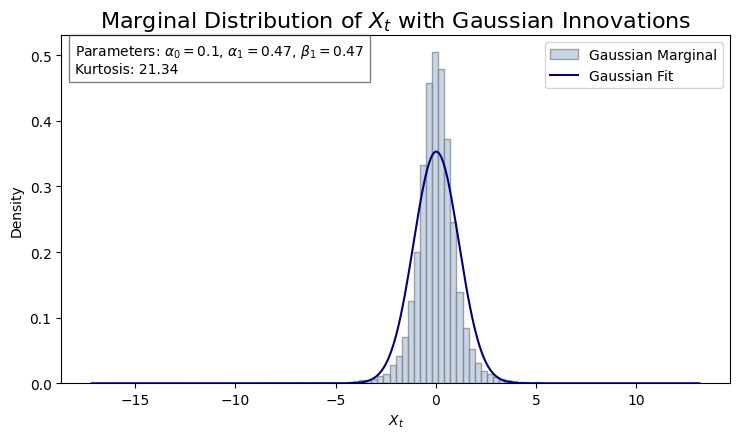

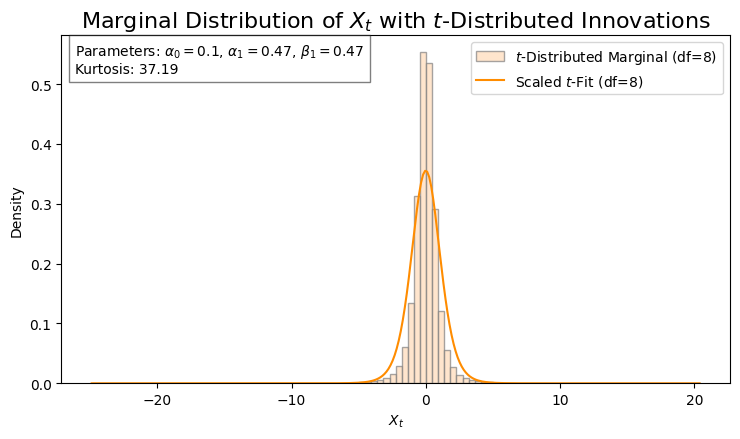

Summary for Gaussian Innovations:
Observed Variance of X_t: 1.276
Theoretical Variance of X_t: 1.667

Summary for t-Distributed Innovations:
Observed Variance of X_t: 1.183
Theoretical Variance of X_t (approximated): 1.667


In [4]:
plot_garch_separate(0.1,0.47,0.47,seed=True,summary=True,df=8)

# ***Stock with high variance (or why we need GARCH models)***

[*********************100%***********************]  1 of 1 completed


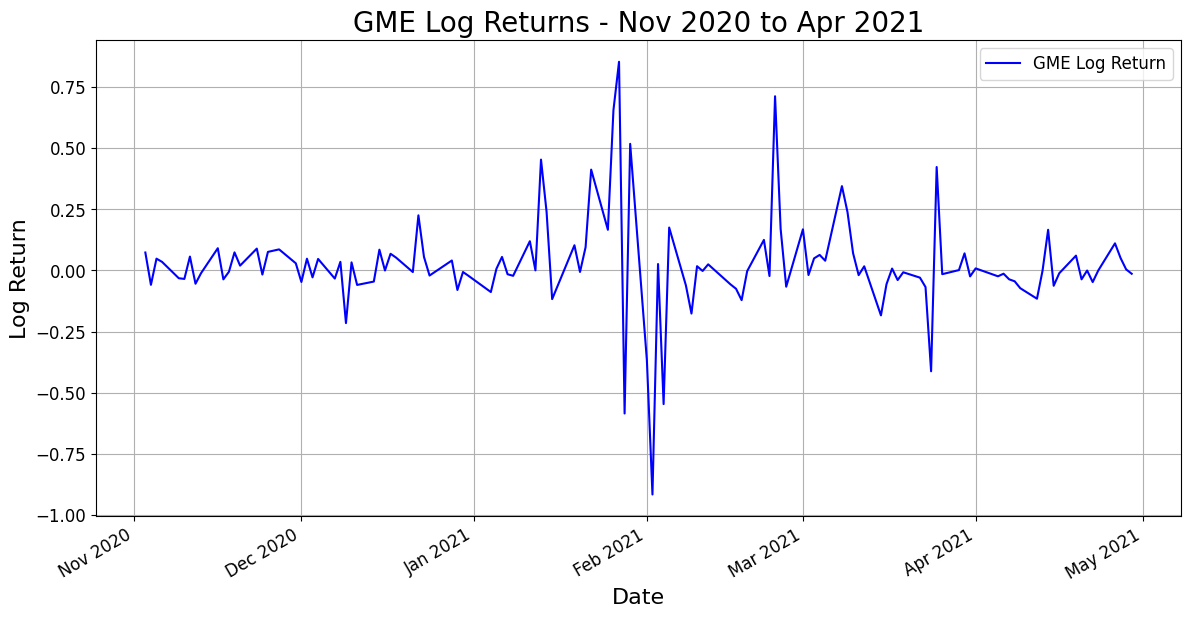

In [5]:
import yfinance as yf
import matplotlib.dates as mdates


ticker_symbol='GME'
start_date='2020-11-01'
end_date='2021-04-30'

# Fetch the stock data for the specified period
hist = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate log returns
hist['Log Return']=np.log(hist['Close']/hist['Close'].shift(1))

# Drop the NaN values resulting from the shift
hist.dropna(inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Log Return'], label='GME Log Return', color='blue')
plt.title('GME Log Returns - Nov 2020 to Apr 2021', fontsize=20)
plt.xlabel('Date', fontsize=16, color='black')
plt.ylabel('Log Return', fontsize=16, color='black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.legend(fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()


# ***Solving for $\kappa$ (Gaussian innovations)***

In [6]:
import scipy.integrate

def f(kappa,alpha_1,beta_1):
  def integrand(z):
    p = (alpha_1*(z**2)+beta_1)**(kappa/2)
    return (p*scipy.stats.norm.pdf(z,loc=0,scale=1))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral

alpha_1=0.05
beta_1=0.91

def plot_kappa_solutions_gaussians(xmin,xmax,alpha_1,beta_1):

  k =np.linspace(xmin,xmax,50)
  f_vectorize = np.vectorize(lambda kappa:f(kappa,alpha_1,beta_1))

  f_values = f_vectorize(k)

  plt.figure(figsize=(9,6))
  plt.plot(k,f_values,label=rf'$f(\kappa), \alpha_1={alpha_1}, \beta_1={beta_1}$')
  plt.axhline(y=1,color='red',linestyle='--')
  #plt.axhline(y=0,color='black',linestyle='-')  #TO COMMENT OUT FOR BETTER Y RANGE VALUES
  plt.axvline(x=0,color='black',linestyle='-')
  plt.grid(True)
  plt.ylabel(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$")
  plt.xlabel(r"$\kappa$")
  plt.title(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$ as a function of $\kappa$")
  plt.legend()
  plt.show()

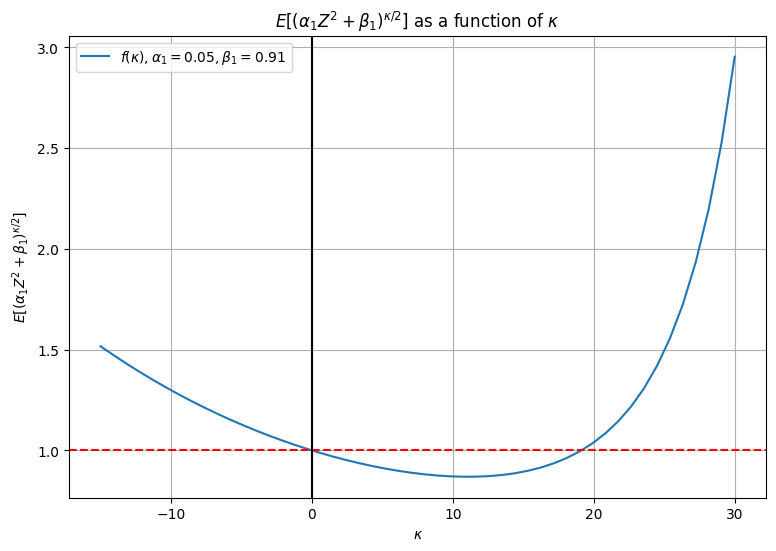

In [7]:
plot_kappa_solutions_gaussians(-15,30,alpha_1,beta_1)

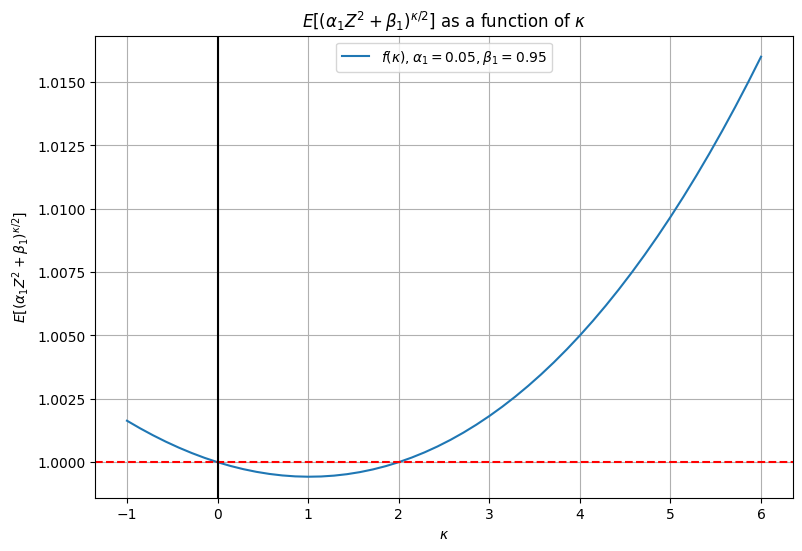

In [8]:
plot_kappa_solutions_gaussians(-1,6,0.05,0.95)

## ***Fitted model parameters***

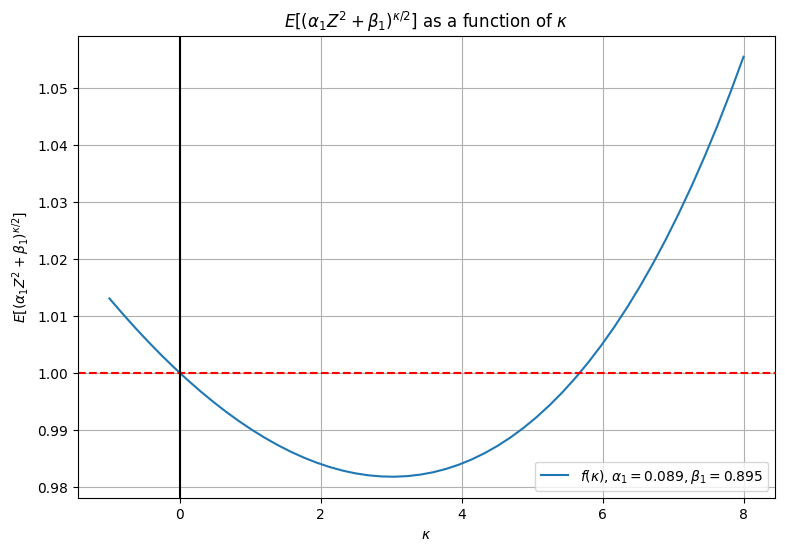

In [9]:
alpha_1_fit = 0.0890
beta_1_fit = 0.895
#To obtain a better range of values for y, comment out line 23 in the plot_kappa function above
plot_kappa_solutions_gaussians(-1,8,alpha_1_fit,beta_1_fit)

# ***Solving for $\kappa$ ($t$-distributed innovations)***

In [10]:
def plot_kappa_solutions_t(xmin,xmax,alpha_1,beta_1,nu):

  def f(kappa,alpha_1,beta_1,nu):
    def integrand(z):
      p = (alpha_1*(z**2)+beta_1)**(kappa/2)
      return (p*scipy.stats.t.pdf(z,df=nu,scale=np.sqrt((nu-2)/nu)))
    integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
    return integral

  k =np.linspace(xmin,xmax,100)
  f_vectorize = np.vectorize(lambda kappa:f(kappa,alpha_1,beta_1,nu))

  f_values = f_vectorize(k)

  plt.figure(figsize=(9,6))
  plt.plot(k,f_values,label=rf'$f(\kappa), \alpha_1={alpha_1}, \beta_1={beta_1}$')
  plt.axhline(y=1,color='red',linestyle='--')
  #plt.axhline(y=0,color='black',linestyle='-') #COMMENT OUT FOR BETTER Y RANGE VALUES
  plt.axvline(x=0,color='black',linestyle='-')
  plt.grid(True)
  plt.ylabel(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$")
  plt.xlabel(r"$\kappa$")
  plt.title(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$ as a function of $\kappa$")
  plt.legend()
  plt.show()

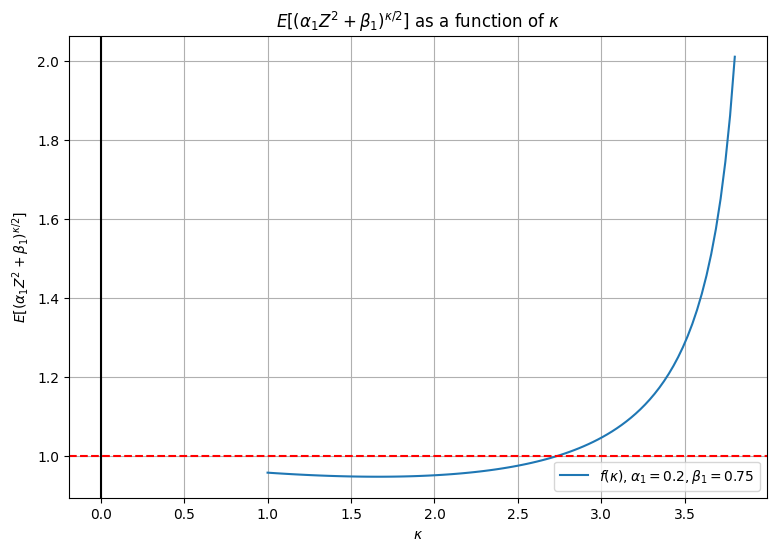

In [11]:
plot_kappa_solutions_t(xmin=1,xmax=3.8,alpha_1=0.2,beta_1=0.75,nu=4)

## ***Fitted parameters***

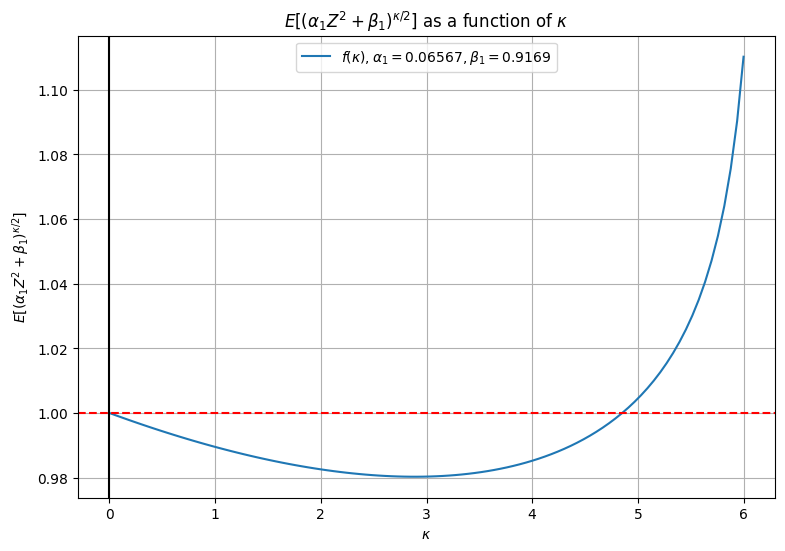

In [12]:
alpha_1_fit = 0.06567
beta_1_fit = 0.9169
nu_hat = 6.318

#Line 20 was commented out to have a nicer, more interpretable y range
plot_kappa_solutions_t(xmin=0,xmax=6,alpha_1=alpha_1_fit,beta_1=beta_1_fit,nu=nu_hat)

# ***Case where $\alpha_1+\beta_1=1$***

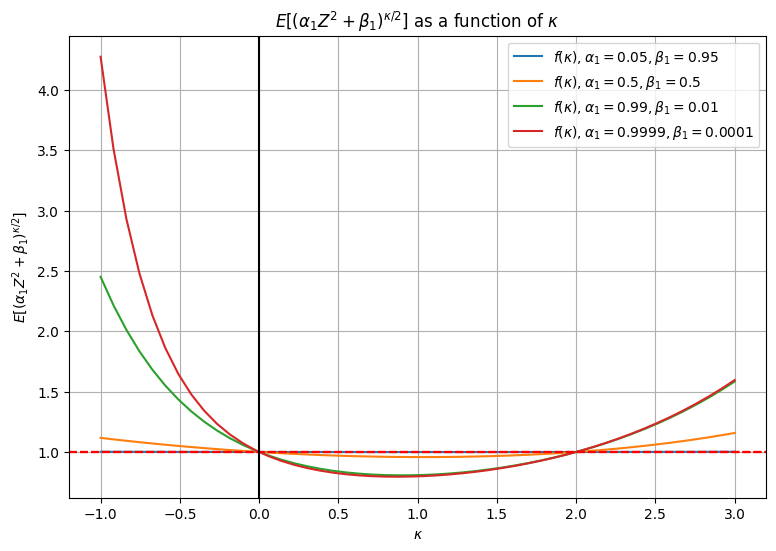

In [16]:
def f(kappa,alpha_1,beta_1):
  def integrand(z):
    p = (alpha_1*(z**2)+beta_1)**(kappa/2)
    return (p*scipy.stats.norm.pdf(z,loc=0,scale=1))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral

plt.figure(figsize=(9,6))
param=[[0.05,0.95],[0.5,0.5],[0.99,0.01],[0.9999,0.0001]]
k =np.linspace(-1,3,50)
for p in param:
  f_vectorize = np.vectorize(lambda kappa:f(kappa,p[0],p[1]))
  f_values = f_vectorize(k)
  plt.plot(k,f_values,label=rf'$f(\kappa), \alpha_1={p[0]}, \beta_1={p[1]}$')
  plt.axhline(y=1,color='red',linestyle='--')
  #plt.axhline(y=0,color='black',linestyle='-')  #TO COMMENT OUT FOR BETTER Y RANGE VALUES
plt.axvline(x=0,color='black',linestyle='-')
plt.grid(True)
plt.ylabel(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$")
plt.xlabel(r"$\kappa$")
plt.title(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$ as a function of $\kappa$")
plt.legend()
plt.show()

# ***Multi-plot (ignore)***

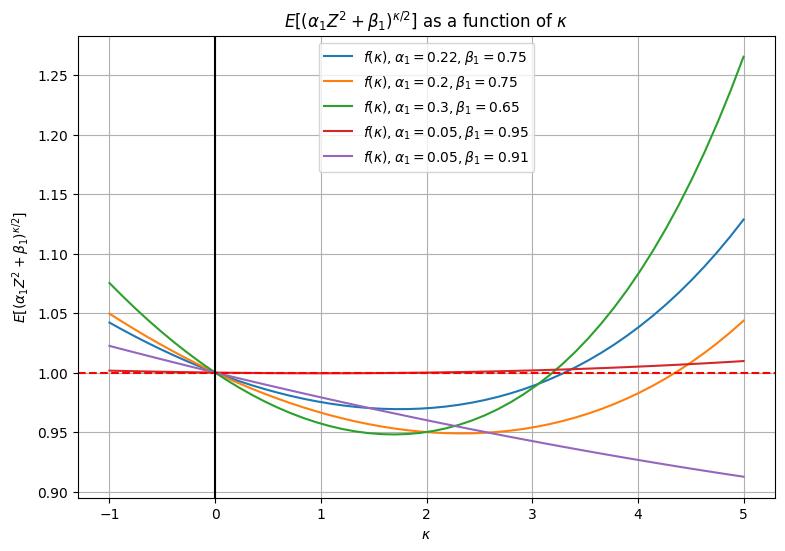

In [17]:
def f(kappa,alpha_1,beta_1):
  def integrand(z):
    p = (alpha_1*(z**2)+beta_1)**(kappa/2)
    return (p*scipy.stats.norm.pdf(z,loc=0,scale=1))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral

param = ([0.22,0.75],[0.2,0.75],[0.3,0.65],[0.05,0.95],[0.05,0.91])

plt.figure(figsize=(9,6))
k =np.linspace(-1,5,50)
for p in param:
  f_vectorize = np.vectorize(lambda kappa:f(kappa,p[0],p[1]))

  f_values = f_vectorize(k)
  plt.plot(k,f_values,label=rf'$f(\kappa), \alpha_1={p[0]}, \beta_1={p[1]}$')


plt.axhline(y=1,color='red',linestyle='--')
plt.axvline(x=0,color='black',linestyle='-')
plt.grid(True)
plt.ylabel(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$")
plt.xlabel(r"$\kappa$")
plt.title(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$ as a function of $\kappa$")
plt.legend()
plt.show()



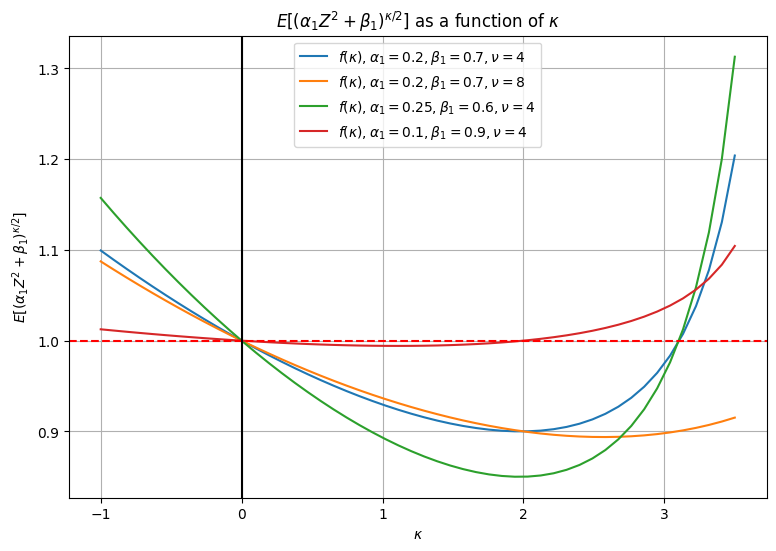

In [18]:
def f(kappa,alpha_1,beta_1,nu):
  def integrand(z):
    p = (alpha_1*(z**2)+beta_1)**(kappa/2)
    return (p*scipy.stats.t.pdf(z,df=nu,scale=np.sqrt((nu-2)/nu)))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral

param = ([0.2,0.7,4],[0.2,0.7,8],[0.25,0.6,4],[0.1,0.9,4])

plt.figure(figsize=(9,6))
k =np.linspace(-1,3.5,50)
for p in param:
  f_vectorize = np.vectorize(lambda kappa:f(kappa,p[0],p[1],p[2]))
  f_values = f_vectorize(k)
  plt.plot(k,f_values,label=rf'$f(\kappa), \alpha_1={p[0]}, \beta_1={p[1]}, \nu={p[2]}$')


plt.axhline(y=1,color='red',linestyle='--')
plt.axvline(x=0,color='black',linestyle='-')
plt.grid(True)
plt.ylabel(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$")
plt.xlabel(r"$\kappa$")
plt.title(r"$E[(\alpha_1 Z^2 + \beta_1)^{\kappa/2}]$ as a function of $\kappa$")
plt.legend()
plt.show()



# ***Heatmap of assumptions over $]0,1[^2$***

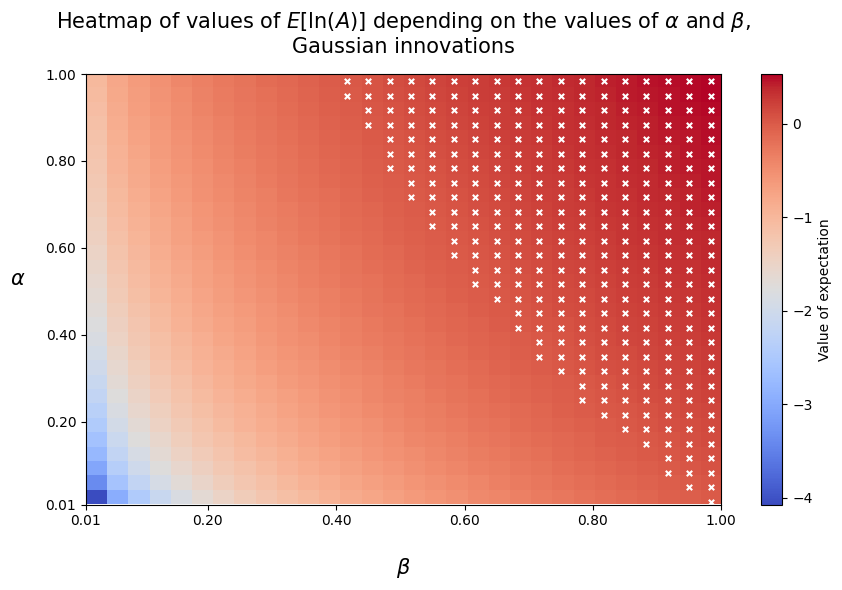

In [19]:
def condition_value_gauss(alpha,beta):
  def integrand(z):
    return (np.log(alpha*(z**2)+beta)*scipy.stats.norm.pdf(z,loc=0,scale=1))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral

n=30
alpha_grid = np.linspace(0.01,1,n) #can not start at (0,0) otherwise we have log(0)
beta_grid = np.linspace(0.01,1,n)

hm = np.zeros((n,n))

for i,alpha in enumerate(alpha_grid):
  for j,beta in enumerate(beta_grid):
    hm[i][j] = condition_value_gauss(alpha,beta)

hm = hm[::-1, :] #Flip the matrix across the x axis for heatmap representation

plt.figure(figsize=(9,6))
plt.imshow(hm, cmap='coolwarm',extent=[0.01,1,0.01,1],aspect='auto')
cbar = plt.colorbar()
cbar.set_label("Value of expectation")
current_xticks = plt.xticks()[0]  # Get current x-ticks
current_yticks = plt.yticks()[0]  # Get current y-ticks
plt.xticks(np.unique(np.append(current_xticks, 0.01)), fontsize=10)
plt.yticks(np.unique(np.append(current_yticks, 0.01)), fontsize=10)
plt.xlabel(r"$\beta$",fontsize=15,labelpad=20)
plt.ylabel(r"$\alpha$",rotation=0,fontsize=15,labelpad=20)
plt.title(
    f"Heatmap of values of $E[\\ln(A)]$ depending on the values of $\\alpha$ and $\\beta$,\n"
    f"Gaussian innovations",
    pad=15,
    fontsize=15
)

cell_size = 1.0/n
for i in range(n):
    for j in range(n):
        if hm[n-1-i, j]>0:
            x_center = (j+0.5)*cell_size
            y_center = (i+0.5)*cell_size
            # Using scatter to place an 'x' marker
            plt.scatter(x_center,y_center,marker='x',color='white',s=15)

plt.tight_layout()
plt.show()

In [ ]:
print(al)

In [ ]:
def condition_value_t(alpha,beta,nu):
  def integrand(z):
    return (np.log(alpha*(z**2)+beta)*scipy.stats.t.pdf(z,df=nu,scale=np.sqrt((nu-2)/nu)))
  integral,_= scipy.integrate.quad(integrand,a=-np.inf,b=np.inf)
  return integral


def heatmap_conditions_t(nu):
  n=30
  alpha_grid = np.linspace(0.01,1,n)
  beta_grid = np.linspace(0.01,1,n)

  hm = np.zeros((n,n))

  for i,alpha in enumerate(alpha_grid):
    for j,beta in enumerate(beta_grid):
      hm[i][j] = condition_value_t(alpha,beta,nu)

  hm = hm[::-1, :] #Flip the axis across the x axis for heatmap representation

  plt.figure(figsize=(9,6))
  plt.imshow(hm, cmap='coolwarm', extent=[0.01,1,0.01,1], aspect='auto')
  cbar = plt.colorbar()
  cbar.set_label("Value of expectation")
  plt.xlabel(r"$\alpha$",fontsize=15,labelpad=20)
  plt.ylabel(r"$\beta$",rotation=0,fontsize=15,labelpad=20)
  current_xticks = plt.xticks()[0]
  current_yticks = plt.yticks()[0]
  plt.xticks(np.unique(np.append(current_xticks, 0.01)), fontsize=10)
  plt.yticks(np.unique(np.append(current_yticks, 0.01)), fontsize=10)
  plt.title(
    f"Heatmap of values of $E[\\ln(A)]$ depending on the values of $\\alpha$ and $\\beta$,\n"
    f"$t$-distributed innovations, $\\nu$={nu}",
    pad=15,
    fontsize=15
  )


  cell_size = 1.0/n

  for i in range(n):
    for j in range(n):
      if hm[i, j]>0:
        x_center = (j+0.5)*cell_size
        y_center = (n-i-0.5)*cell_size
        # Using scatter to place an 'x' marker
        plt.scatter(x_center,y_center,marker='x',color='white',s=15)

  plt.tight_layout()
  plt.show()

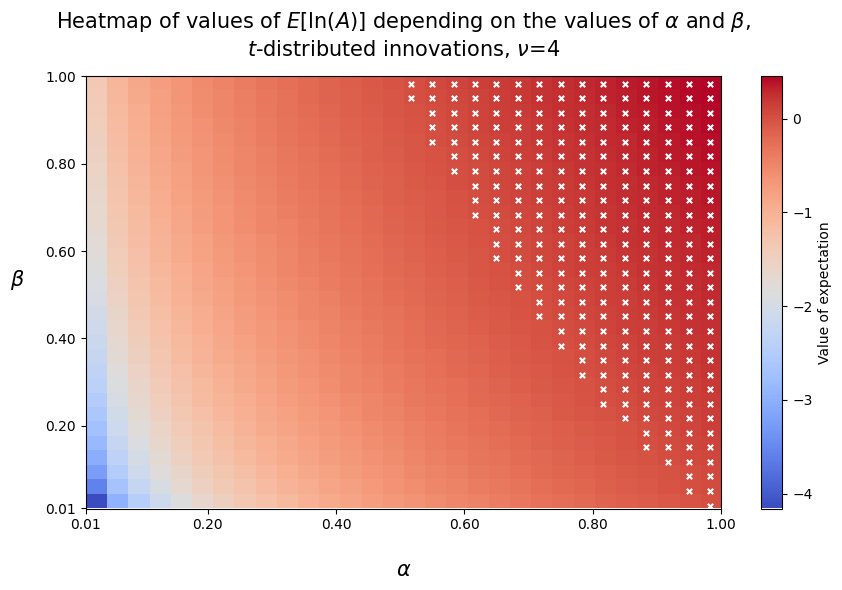

In [ ]:
heatmap_conditions_t(nu=4)

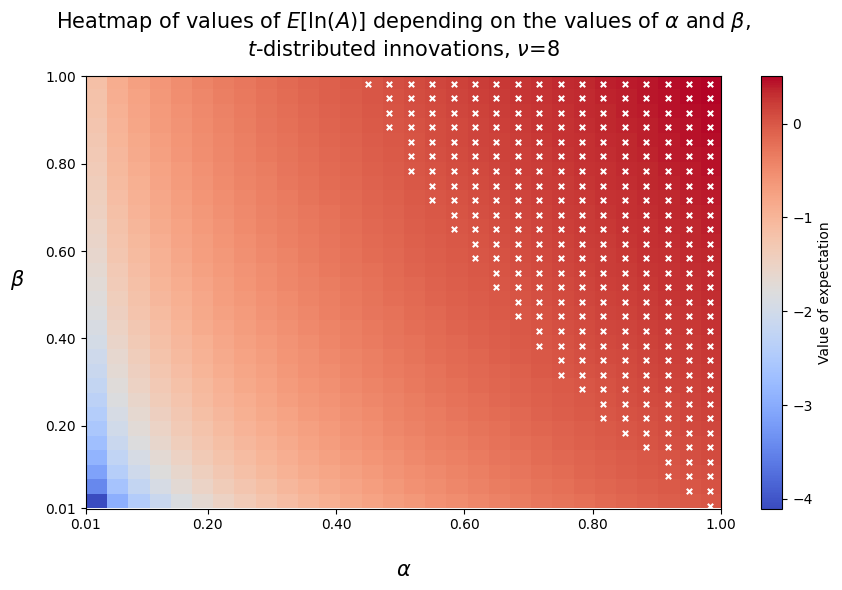

In [ ]:
heatmap_conditions_t(nu=8)

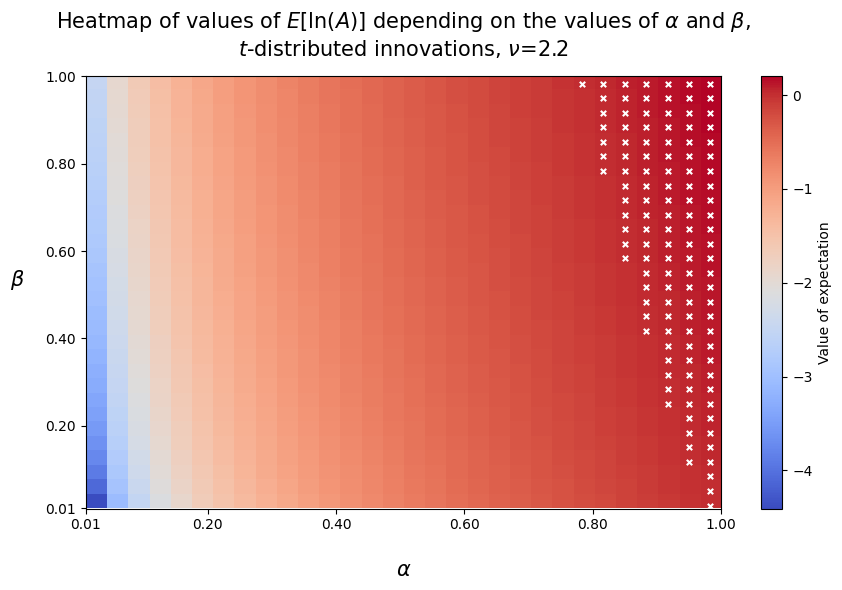

In [ ]:
heatmap_conditions_t(nu=2.2)